In [191]:
#In this notebook I will access an external data source and work with its data


In [192]:
#Pandas
#An open source data analysis and manipulation tool
#A python package that uses fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive.
import pandas as pd

#NumPy
#Provides tools for scientific and high performance computing, which are used in the pandas library.
#Array objects and functions usable on matrices facilitate much of the speed and convenience of the pandas library.
import numpy as np

#MathPlotLib
#Provides graphing functionality to create data visualizations in python.
#Allows for visualizations to be customized and scripted so that visualizations can be automated.
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
#Figure out yesterday's date, so that the data from the most recent date is used

import datetime

# Current date time in local system
today = datetime.date.today()
one_day = datetime.timedelta(days=1)
yesterday = today - one_day
print(yesterday)

#Reformat the date format and append .csv
data_date = yesterday.strftime('%m-%d-%Y')
daily_csv = data_date + '.csv'
daily_csv

#Before I can use this, I need to figure out how to automatically update the data each day

2020-03-21


'03-21-2020.csv'

In [194]:
#I installed git on my machine and then cloned the John Hopkins COVID dataset that Doug used in his COVID analysis
#git clone https://github.com/CSSEGISandData/COVID-19.git
#Then I figured out that I could access a datafile directly from git hub by going to the the raw tab on the dataset and getting the url
#I'm hoping this isn't rude to do

daily_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + daily_csv
print(daily_url)
df_daily = pd.read_csv(daily_url)
df_daily

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-21-2020.csv


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880
5,France,France,2020-03-21T20:43:02,14282,562,12,46.2276,2.2137
6,New York,US,2020-03-21T22:43:04,11710,60,0,42.1657,-74.9481
7,NaN,"Korea, South",2020-03-21T11:13:12,8799,102,1540,35.9078,127.7669
8,NaN,Switzerland,2020-03-21T20:43:02,6575,75,15,46.8182,8.2275
9,United Kingdom,United Kingdom,2020-03-21T20:43:03,5018,233,65,55.3781,-3.4360


In [195]:
#Let's see what it tells us about our dataset
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 8 columns):
Province/State    135 non-null object
Country/Region    304 non-null object
Last Update       304 non-null object
Confirmed         304 non-null int64
Deaths            304 non-null int64
Recovered         304 non-null int64
Latitude          304 non-null float64
Longitude         304 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 19.1+ KB


In [196]:
df_daily.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880


In [197]:
df_daily = df_daily.drop(columns=['Latitude','Longitude','Last Update'])
df_daily.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,Hubei,China,67800,3139,58946
1,NaN,Italy,53578,4825,6072
2,NaN,Spain,25374,1375,2125
3,NaN,Germany,22213,84,233
4,NaN,Iran,20610,1556,7635


In [198]:
#Sum Confirmed, Deaths, and Recovered by Country/Region
Region = df_daily.groupby( ['Country/Region']).sum()
Region.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,24,0,1
Albania,76,2,2
Algeria,139,15,32
Andorra,88,0,1
Angola,2,0,0


In [199]:
#List the top 10 status based on confirmed cases
US = df_daily[df_daily['Country/Region'] == 'US'].sort_values('Confirmed',ascending=False)
US=US.head(10)
US

,Province/State,Country/Region,Confirmed,Deaths,Recovered
6,New York,US,11710,60,0
14,Washington,US,1793,94,0
17,California,US,1364,24,0
18,New Jersey,US,1327,16,0
31,Michigan,US,788,5,0
34,Illinois,US,753,6,0
39,Florida,US,659,13,0
41,Louisiana,US,585,16,0
42,Texas,US,581,5,0
48,Massachusetts,US,525,1,0


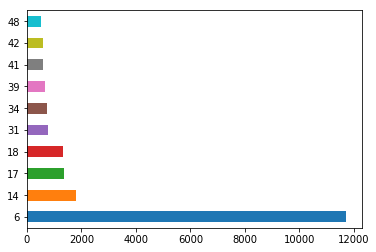

In [200]:
#Attempting to plot by US state based on confirmed cases
US['Confirmed'].plot.barh()
#Hmm can't figure out how to add y axis labels doing it this way

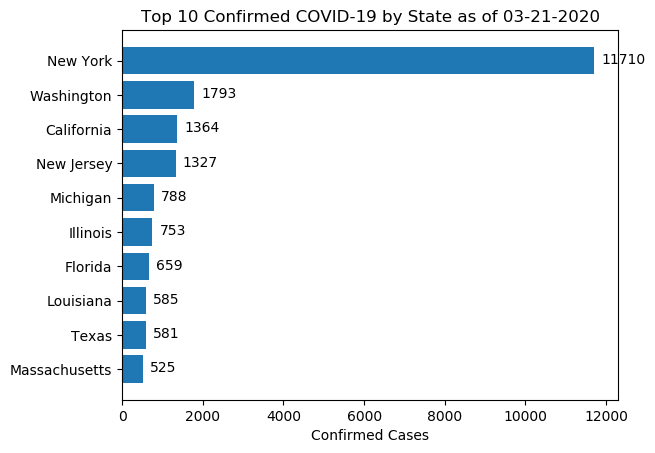

In [201]:
#Trying another way to plot the states with the top 10 confirmed case counts
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(US['Confirmed']))
ax.barh(y_pos, US['Confirmed'])
ax.set_yticks(y_pos)
ax.set_yticklabels(US['Province/State'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Confirmed Cases')
ax.set_title('Top 10 Confirmed COVID-19 by State as of ' + data_date)
for p in ax.patches :
    ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, -12), textcoords='offset points', horizontalalignment='left')
plt.show()

In [266]:
#Now I'm going to attempt to do a line graph with a trend line of US cases
df_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_ts.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


In [267]:
#Let's see what we've got
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 64 columns):
Province/State    325 non-null object
Country/Region    482 non-null object
Lat               482 non-null float64
Long              482 non-null float64
1/22/20           482 non-null int64
1/23/20           482 non-null int64
1/24/20           482 non-null int64
1/25/20           482 non-null int64
1/26/20           482 non-null int64
1/27/20           482 non-null int64
1/28/20           482 non-null int64
1/29/20           482 non-null int64
1/30/20           482 non-null int64
1/31/20           482 non-null int64
2/1/20            482 non-null int64
2/2/20            482 non-null int64
2/3/20            482 non-null int64
2/4/20            482 non-null int64
2/5/20            482 non-null int64
2/6/20            482 non-null int64
2/7/20            482 non-null int64
2/8/20            482 non-null int64
2/9/20            482 non-null int64
2/10/20           482 non-null int64
2

In [268]:
US_ts = df_ts[df_ts['Country/Region'] == 'US']
US_ts = US_ts.drop(columns=['Lat','Long'])
US_ts.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
98,Washington,US,0,0,0,0,0,0,0,0,...,442,568,572,643,904,1076,1014,1376,1524,1793
99,New York,US,0,0,0,0,0,0,0,0,...,328,421,525,732,967,1706,2495,5365,8310,11710
100,California,US,0,0,0,0,0,0,0,0,...,221,282,340,426,557,698,751,952,1177,1364
101,Massachusetts,US,0,0,0,0,0,0,0,0,...,108,123,138,164,197,218,218,328,413,525
102,Diamond Princess,US,0,0,0,0,0,0,0,0,...,46,46,46,46,47,47,47,47,49,49


In [269]:
US_ts = US_ts.groupby( ['Country/Region']).sum().transpose()
US_ts.tail(10)

Country/Region,US
3/12/20,1663
3/13/20,2179
3/14/20,2727
3/15/20,3499
3/16/20,4632
3/17/20,6421
3/18/20,7783
3/19/20,13677
3/20/20,19100
3/21/20,25489


In [255]:
US_ts.info()
#Since Country/Region is an index instead of a data column, that appears to limit what I can do to it (for example, can't rename)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 1/22/20 to 3/21/20
Data columns (total 1 columns):
US    60 non-null int64
dtypes: int64(1)
memory usage: 960.0+ bytes


In [270]:
US_ts.columns

Index(['US'], dtype='object', name='Country/Region')

In [271]:
#US_ts.columns = ['Confirmed Cases']
US_ts.tail(10)

Country/Region,US
3/12/20,1663
3/13/20,2179
3/14/20,2727
3/15/20,3499
3/16/20,4632
3/17/20,6421
3/18/20,7783
3/19/20,13677
3/20/20,19100
3/21/20,25489


In [272]:
US_ts.columns

Index(['US'], dtype='object', name='Country/Region')

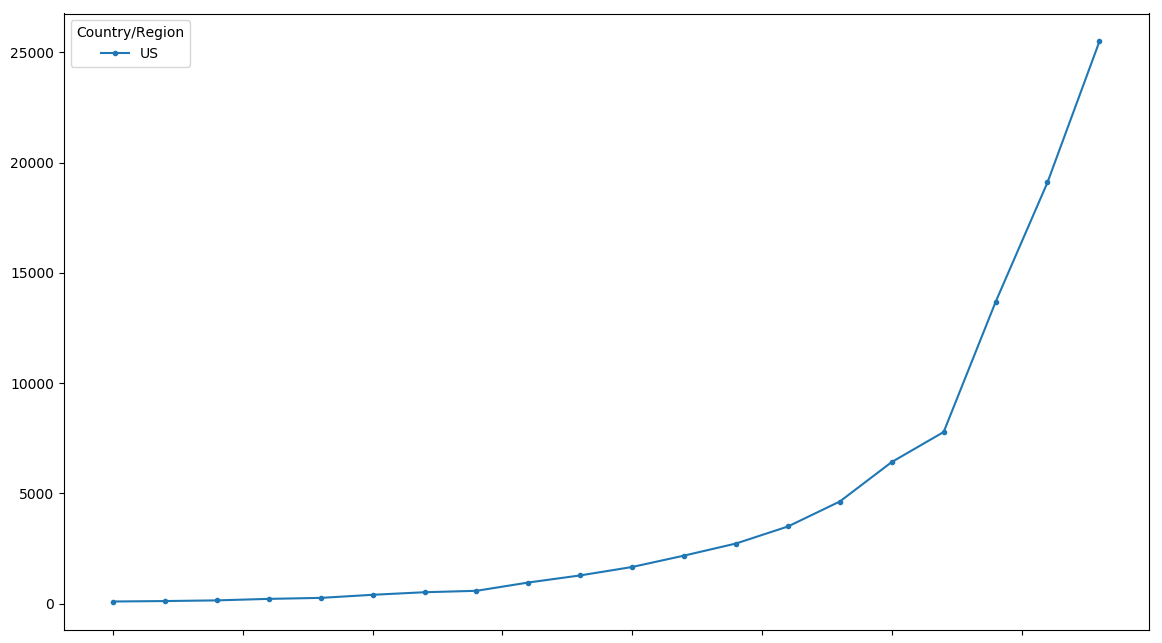

In [287]:
#US_ts.plot(style='.-');
#confirmed[ countries ].tail(20).plot(figsize=(14,8))
US_ts.tail(20).plot(figsize=(14,8), style='.-')

#I don't know why I can't get the dates labeled on the x axis

KeyError: 'Country/Region'

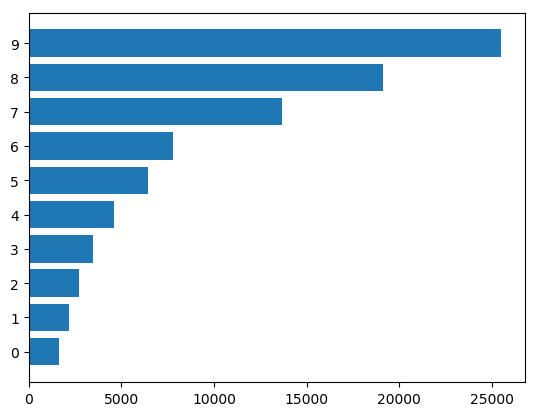

In [284]:
US_ts1=US_ts.tail(10)
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(US_ts1['US']))
ax.barh(y_pos, US_ts1['US'])
ax.set_yticks(y_pos)
ax.set_yticklabels(US_ts1['Country/Region'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Date')
ax.set_title('Test ')
plt.show()